In [ ]:
import pandas as pd
import numpy as np


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
def total_files(folder_path):
  num_files=len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path,f))])
  return num_files

train_files_healthy=r"/content/drive/MyDrive/LP5/Train/Train/Healthy"
train_files_powdery=r"/content/drive/MyDrive/LP5/Train/Train/Powdery"
train_files_rust=r"/content/drive/MyDrive/LP5/Train/Train/Rust"

test_files_healthy=r"/content/drive/MyDrive/LP5/Test/Test/Healthy"
test_files_powdery=r"/content/drive/MyDrive/LP5/Test/Test/Powdery"
test_files_rust=r"/content/drive/MyDrive/LP5/Test/Test/Rust"

valid_files_healthy=r"/content/drive/MyDrive/LP5/Validation/Validation/Healthy"
valid_files_powdery=r"/content/drive/MyDrive/LP5/Validation/Validation/Powdery"
valid_files_rust=r"/content/drive/MyDrive/LP5/Validation/Validation/Rust"

print("Number of healthy leaf images in train set",total_files(train_files_healthy))
print("Number of powdery leaf images in train set",total_files(train_files_powdery))
print("Number of rust leaf images in train set",total_files(train_files_rust))
print("*******************************************************************")
print("Number of healthy leaf images in test set",total_files(test_files_healthy))
print("Number of powdery leaf images in test set",total_files(test_files_powdery))
print("Number of rust leaf images in test set",total_files(test_files_rust))
print("*******************************************************************")
print("Number of healthy leaf images in validation set",total_files(valid_files_healthy))
print("Number of powdery leaf images in validation set",total_files(valid_files_powdery))
print("Number of rust leaf images in validation set",total_files(valid_files_rust))
print("*******************************************************************")

Number of healthy leaf images in train set 458
Number of powdery leaf images in train set 430
Number of rust leaf images in train set 434
*******************************************************************
Number of healthy leaf images in test set 50
Number of powdery leaf images in test set 50
Number of rust leaf images in test set 50
*******************************************************************
Number of healthy leaf images in validation set 20
Number of powdery leaf images in validation set 20
Number of rust leaf images in validation set 20
*******************************************************************


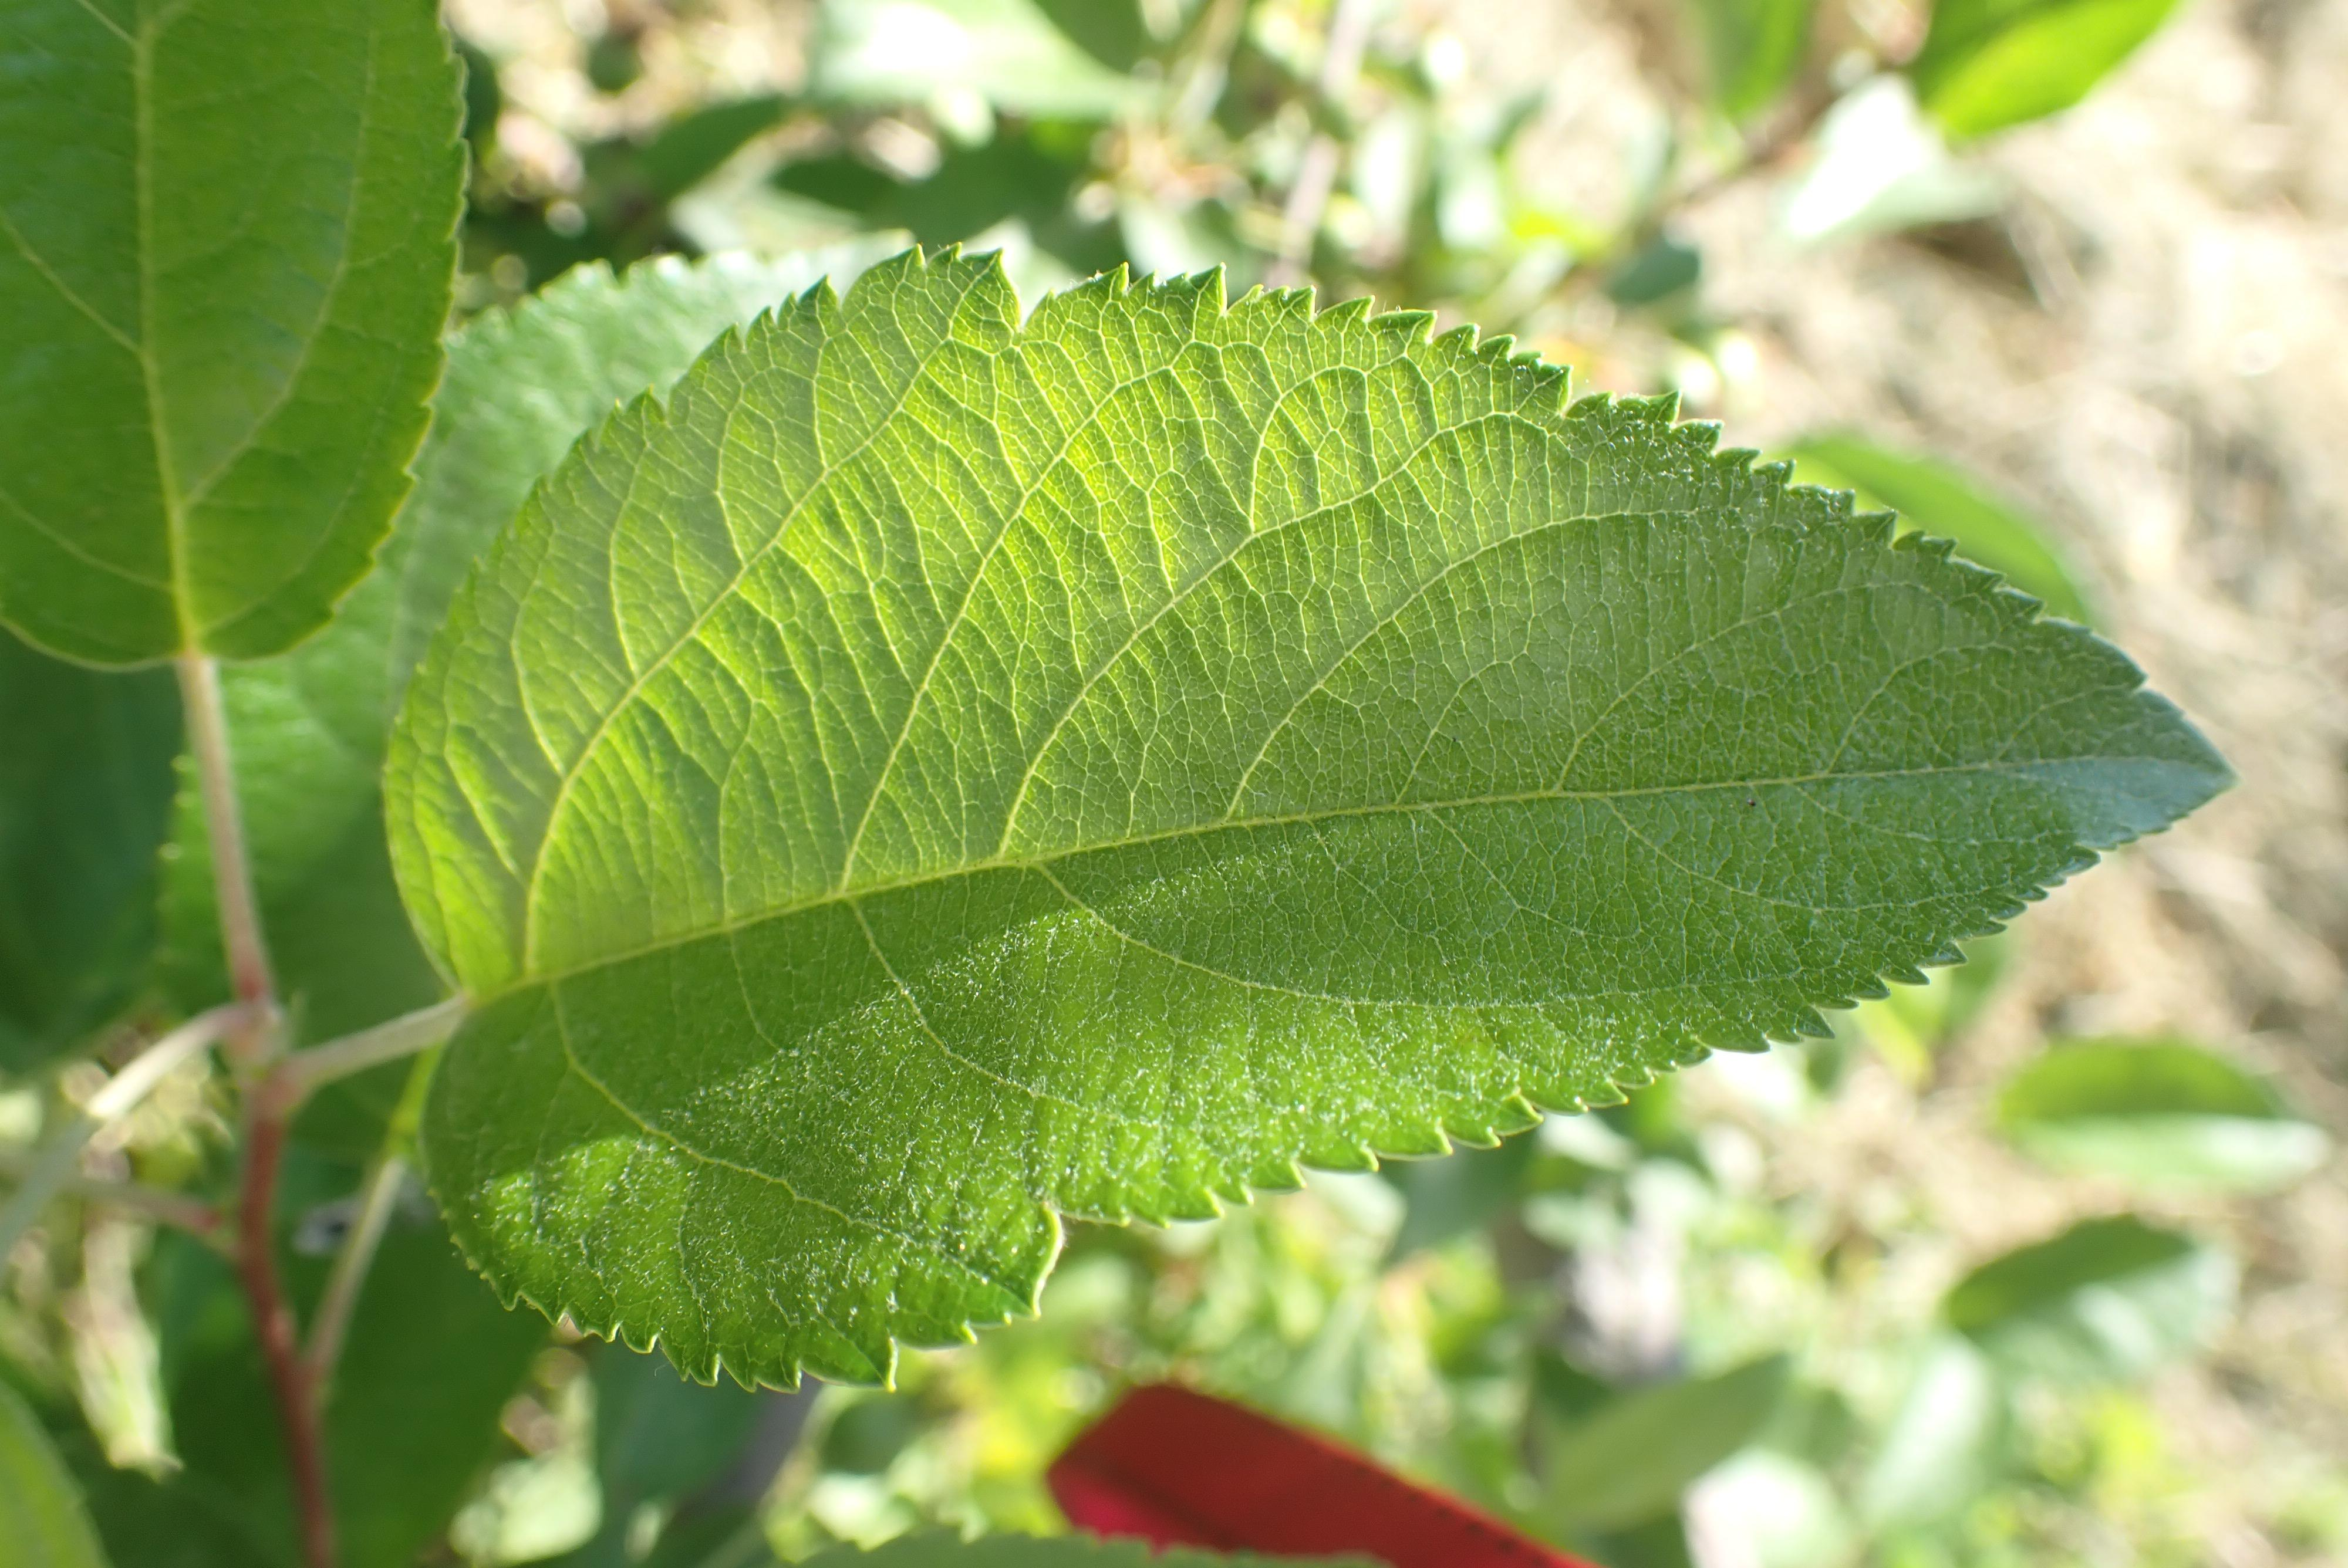

In [ ]:
from PIL import Image
import IPython.display as display
image_path=r'/content/drive/MyDrive/LP5/Train/Train/Healthy/8bc2979962db6549.jpg'
with open(image_path,'rb') as f:
    display.display(display.Image(data=f.read(),width=500))

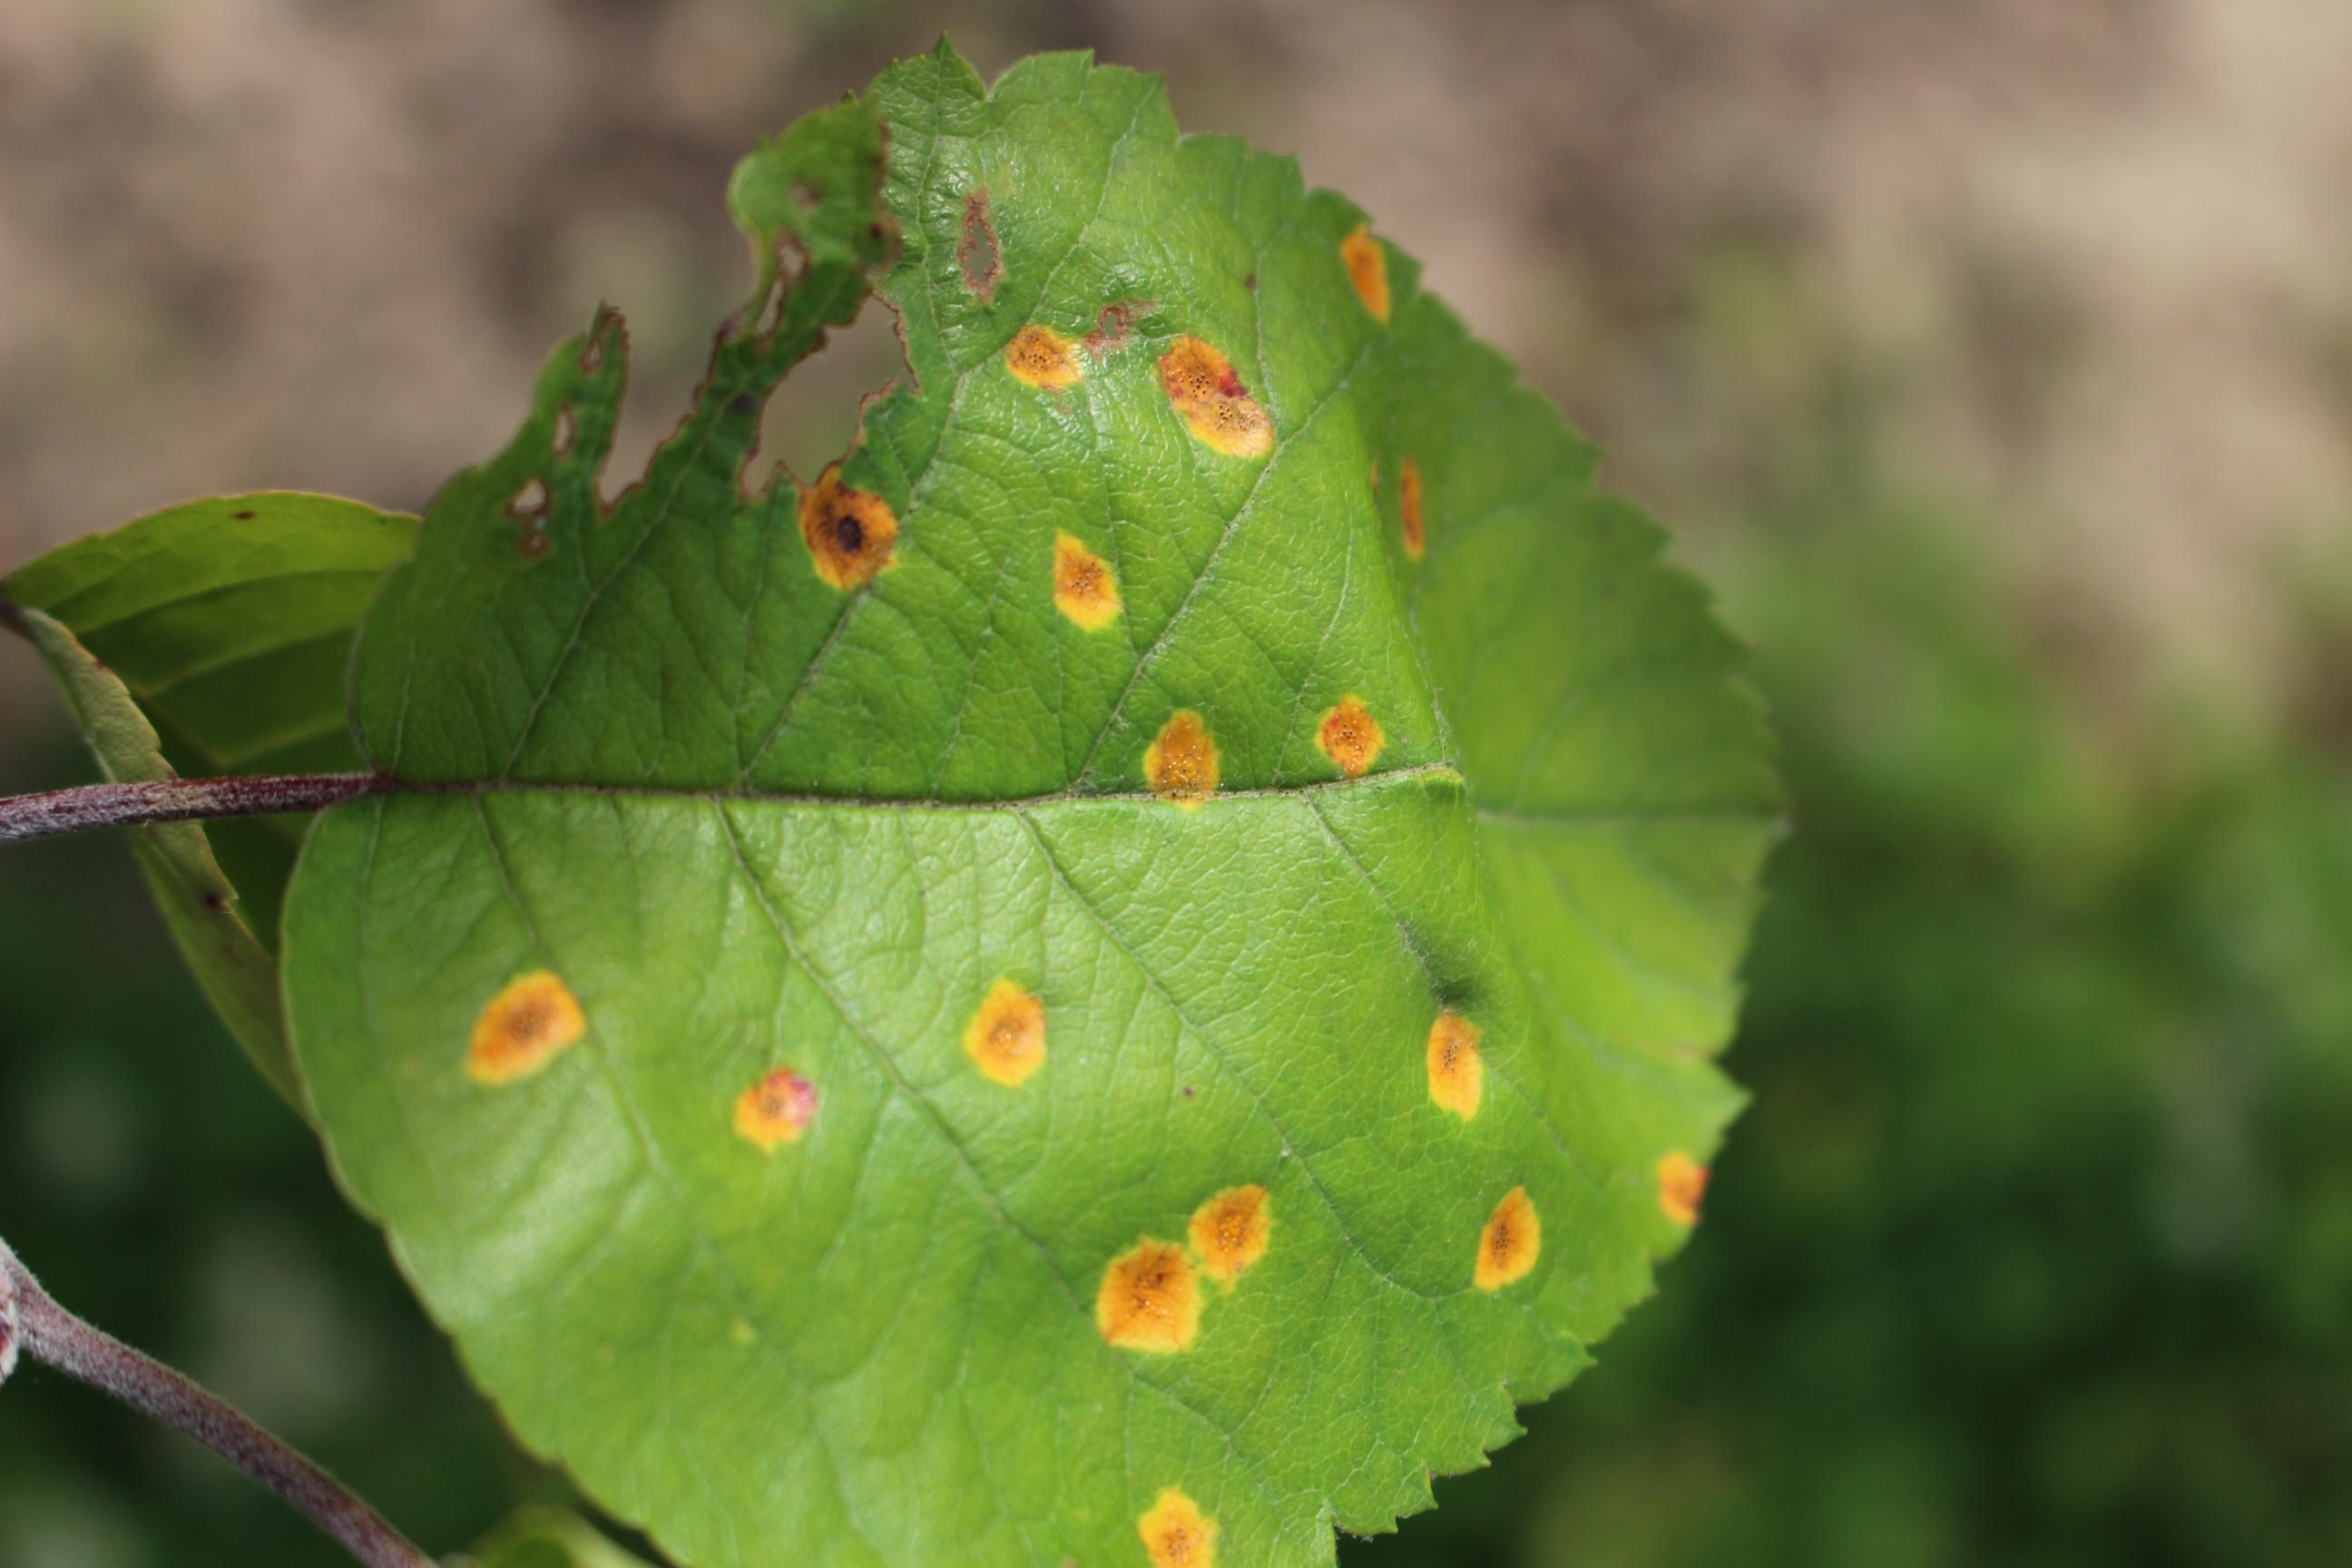

In [ ]:
image_path=r'/content/drive/MyDrive/LP5/Train/Train/Rust/8abc65c20f33e4da.jpg'
with open(image_path,'rb') as f:
    display.display(display.Image(data=f.read(),width=500))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=train_datagen.flow_from_directory(r'/content/drive/MyDrive/LP5/Train/Train',target_size=(225,225),batch_size=32,class_mode='categorical')
validation_generator=test_datagen.flow_from_directory(r'/content/drive/MyDrive/LP5/Validation/Validation',target_size=(225,225),batch_size=32,class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(225,225,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,
                  batch_size=15,
                  epochs=5,
                  validation_data=validation_generator,
                  validation_batch_size=15)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 408s 10s/step - accuracy: 0.5125 - loss: 1.3696 - val_accuracy: 0.7333 - val_loss: 0.5670
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 217s 5s/step - accuracy: 0.8459 - loss: 0.3833 - val_accuracy: 0.8667 - val_loss: 0.3634
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 214s 5s/step - accuracy: 0.9004 - loss: 0.2704 - val_accuracy: 0.8667 - val_loss: 0.5219
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 215s 5s/step - accuracy: 0.9174 - loss: 0.2662 - val_accuracy: 0.8333 - val_loss: 0.4333
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 218s 5s/step - accuracy: 0.9118 - loss: 0.2515 - val_accuracy: 0.8167 - val_loss: 0.3540


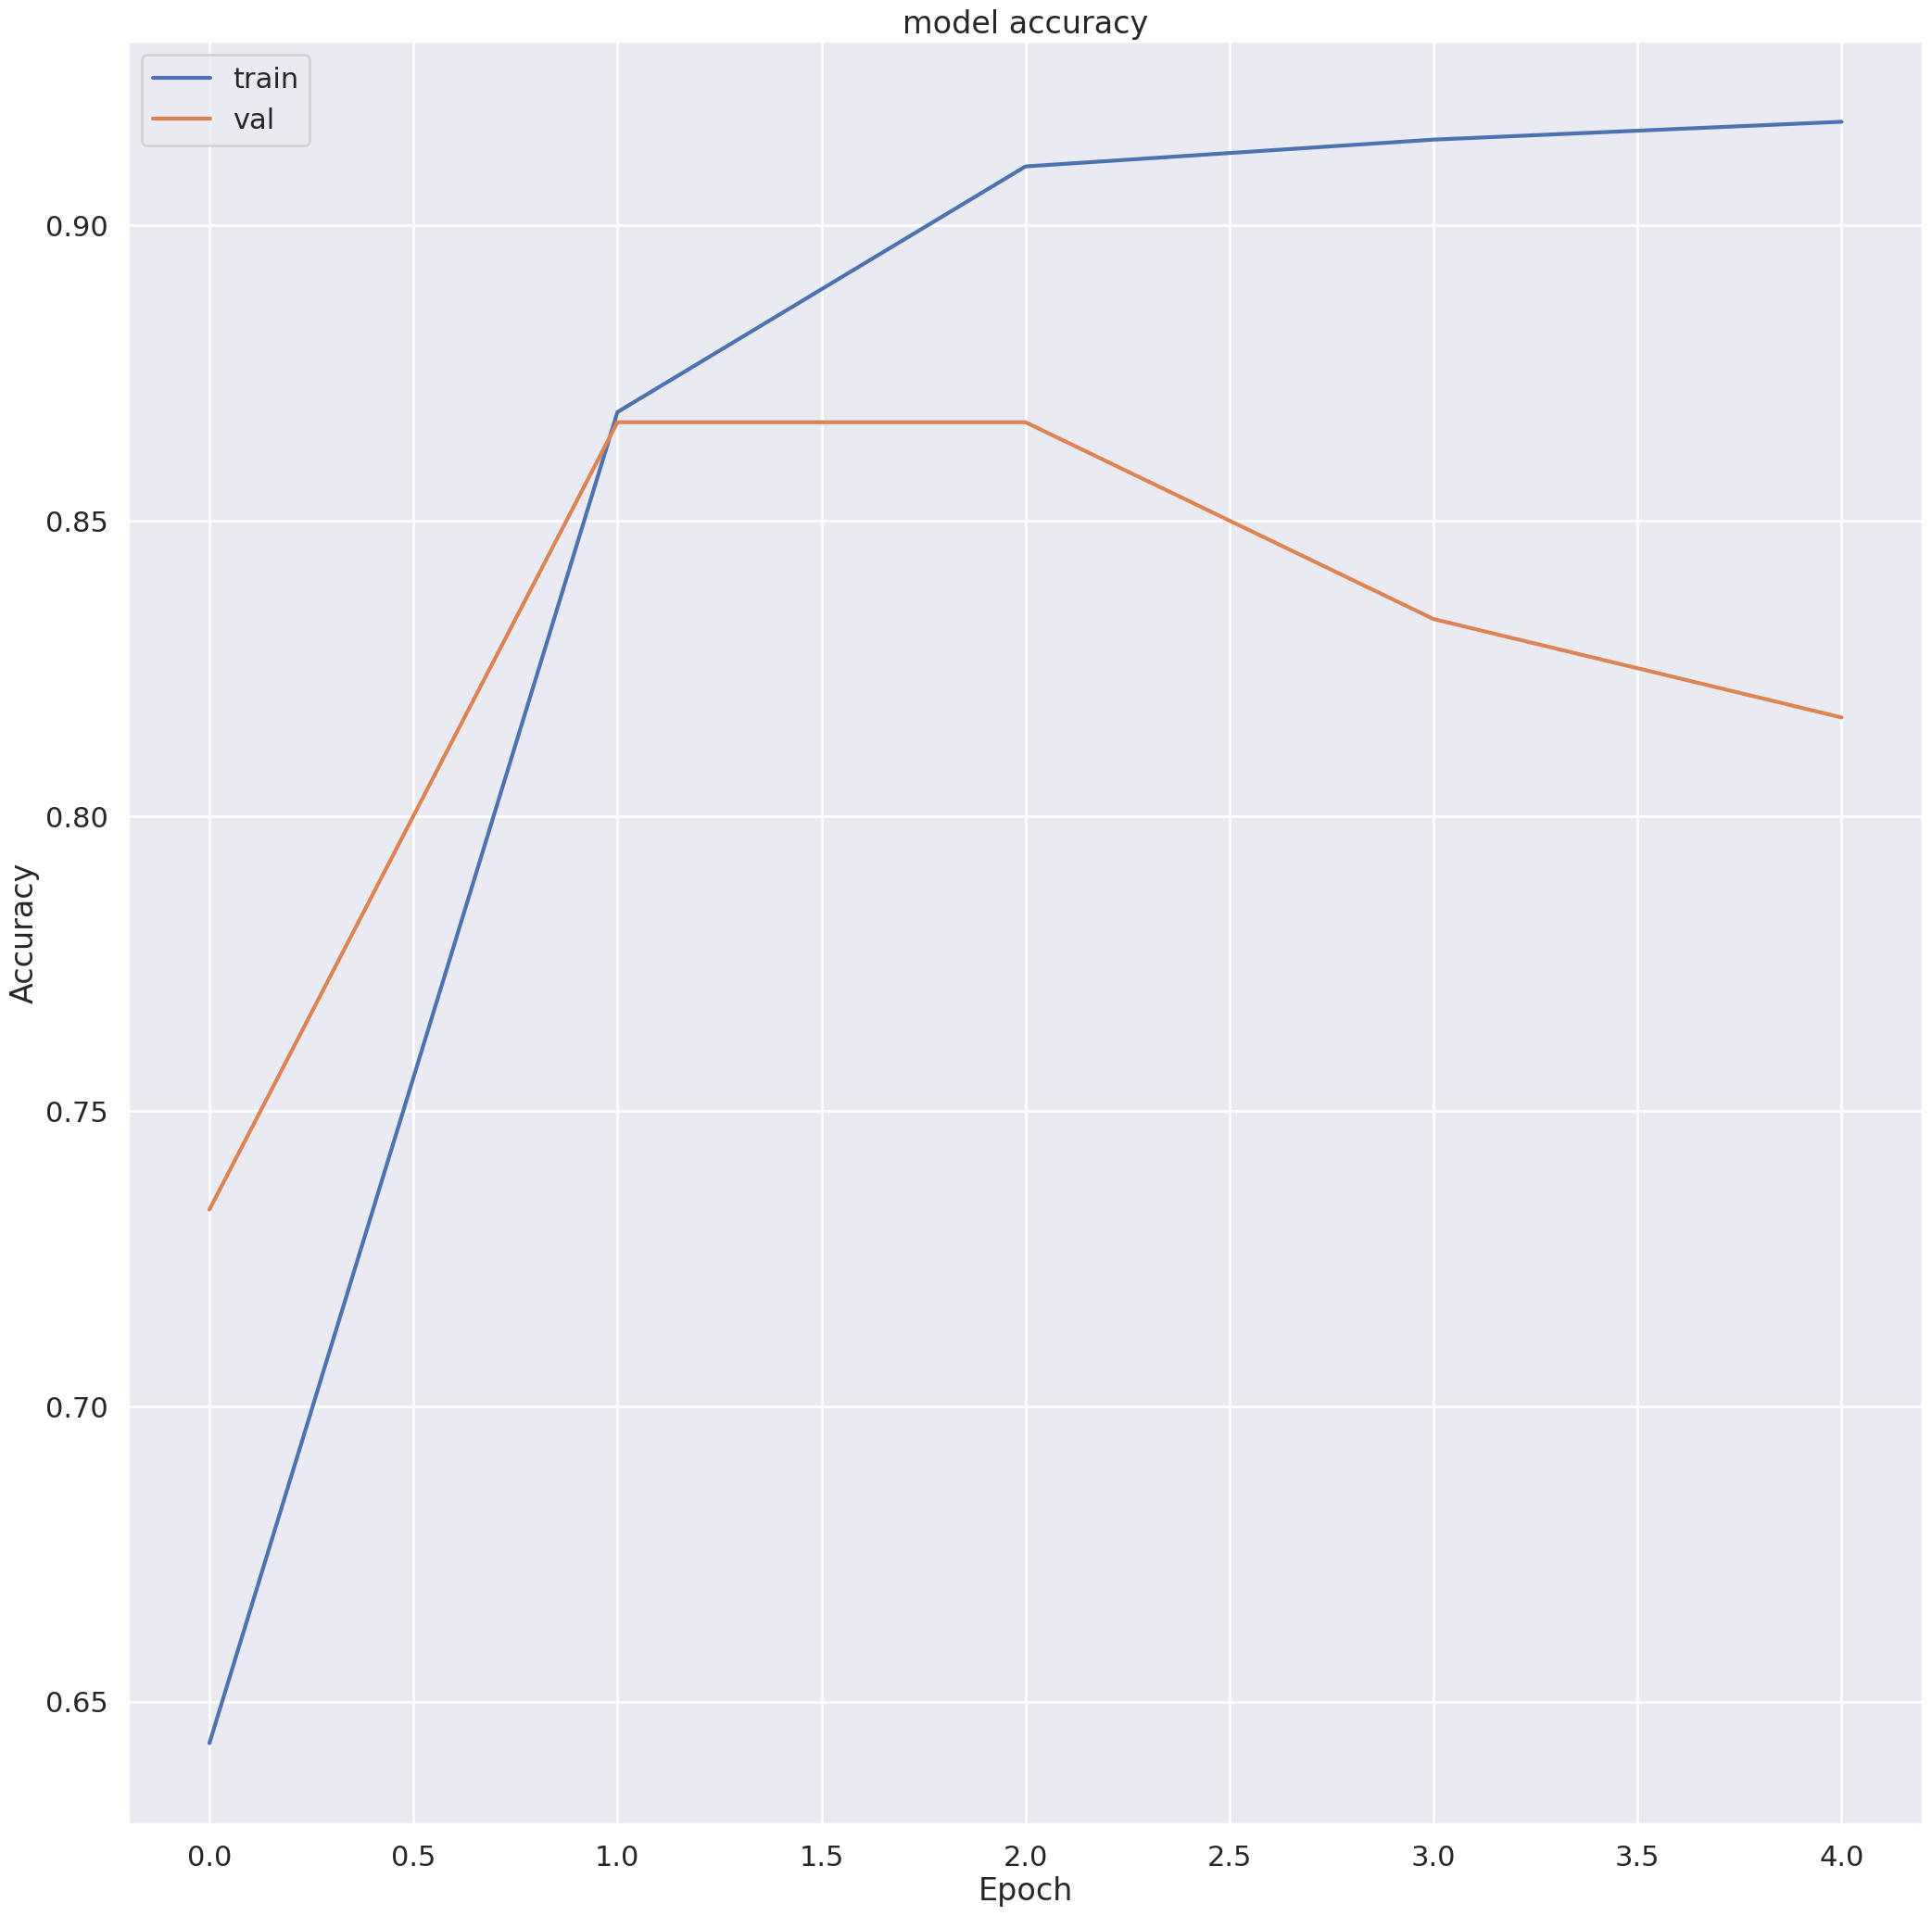

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_theme()
sns.set_context("poster")
figure(figsize=(25,25),dpi=100)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

In [ ]:
model.save("model.h5")

In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
def preprocess_image(image_path,target_size=(225,225)):
    img=load_img(image_path,target_size=target_size)
    x=img_to_array(img)
    x=x.astype('float32')/255.
    x=np.expand_dims(x,axis=0)
    return x

x=preprocess_image(r'/content/drive/MyDrive/LP5/Test/Test/Powdery/81a3b719b6c2b4da.jpg')

In [ ]:
predictions=model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([0.7219661 , 0.08224837, 0.19578557], dtype=float32)

In [ ]:
labels=train_generator.class_indices
labels={v: k for k,v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [ ]:
predicted_label=labels[np.argmax(predictions)]
print(predicted_label)

Healthy
